In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(geomtextpath)
library(ggplot2)
library(ggrepel)
library(ggsci)

is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

Loading required package: ggplot2



In [2]:
df<-read.csv("05_Olink/BR1049_10_Olink.csv")

In [9]:
dfsub<-df %>% filter(sample.daysSinceFirstVisit==381)

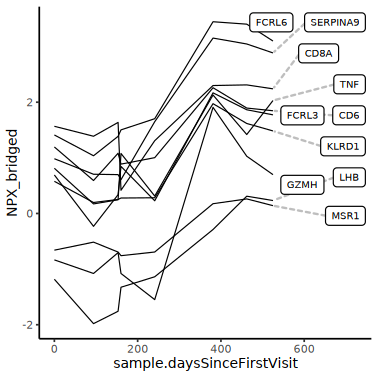

In [6]:
options(repr.plot.width = 80/25.4, repr.plot.height =80/25.4)
 df<-df%>%  mutate(label = if_else(sample.daysSinceFirstVisit == max(sample.daysSinceFirstVisit), as.character(Assay), NA_character_)) 

p<-ggplot(df,aes(x = sample.daysSinceFirstVisit, y = NPX_bridged, group = Assay)) + 
  geom_line(linewidth=0.25) + 
  geom_label_repel(aes(label = label),size=2,nudge_x = 200,  segment.linetype = 2,
segment.color = 'grey',
                  na.rm = TRUE)+theme_classic(base_size =8)+
  theme(legend.position = "none")
p
ggsave('FigureJ.pdf',p,width = 80/25.4,height = 80/25.4)